# Los Angeles Crime Data Analysis from 2020 to Present

### This project focuses on analyzing and forecasting crime trends in Los Angeles using historical crime data from 2020 to the present. The dataset includes detailed information such as crime type, location, time of occurrence, victim demographics, and crime status. The analysis involves data preprocessing, including cleaning, handling missing values, and removing low-frequency crime categories to ensure model efficiency. Descriptive statistics and visualizations are applied to identify patterns and correlations among key variables. For crime trend forecasting, an LSTM (Long Short-Term Memory) model is employed to predict future occurrences based on the 'DATE OCC' field. LSTM, known for its strength in handling sequential data, captures temporal dependencies effectively. The model is trained on historical data, evaluated using RMSE and MAE, and validated with recent crime records. The forecast provides valuable insights for law enforcement agencies to allocate resources more effectively and implement proactive crime prevention strategies.

# 1. LSTM Time Series Prediction

In [1]:
import pandas as pd

In [2]:
path = '/kaggle/input/crime-data-from-2020-to-present/Crime_Data_from_2020_to_Present.csv'

data = pd.read_csv(path)

print(data.head())
print(data.info())

       DR_NO               Date Rptd                DATE OCC  TIME OCC  AREA  \
0  190326475  03/01/2020 12:00:00 AM  03/01/2020 12:00:00 AM      2130     7   
1  200106753  02/09/2020 12:00:00 AM  02/08/2020 12:00:00 AM      1800     1   
2  200320258  11/11/2020 12:00:00 AM  11/04/2020 12:00:00 AM      1700     3   
3  200907217  05/10/2023 12:00:00 AM  03/10/2020 12:00:00 AM      2037     9   
4  220614831  08/18/2022 12:00:00 AM  08/17/2020 12:00:00 AM      1200     6   

   AREA NAME  Rpt Dist No  Part 1-2  Crm Cd  \
0   Wilshire          784         1     510   
1    Central          182         1     330   
2  Southwest          356         1     480   
3   Van Nuys          964         1     343   
4  Hollywood          666         2     354   

                                Crm Cd Desc  ... Status   Status Desc  \
0                          VEHICLE - STOLEN  ...     AA  Adult Arrest   
1                     BURGLARY FROM VEHICLE  ...     IC   Invest Cont   
2                

In [3]:
# Count the occurrences of each unique crime description
crime_counts = data['Crm Cd'].value_counts()

# Display the results
crime_counts

Crm Cd
510    109906
624     74665
330     61012
354     60597
740     59410
        ...  
904         5
906         4
445         4
926         1
453         1
Name: count, Length: 140, dtype: int64

In [4]:
data.shape

(978628, 28)

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [7]:
data['DATE OCC'] = pd.to_datetime(data['DATE OCC'])


crime_counts = data.groupby(data['DATE OCC'].dt.date).size()


crime_counts = np.array(crime_counts).reshape(-1, 1)


scaler = MinMaxScaler(feature_range=(0, 1))
crime_counts_scaled = scaler.fit_transform(crime_counts)


def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)


/tmp/ipykernel_17/3614936222.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['DATE OCC'] = pd.to_datetime(data['DATE OCC'])


In [8]:
time_step = 30
X, y = create_dataset(crime_counts_scaled, time_step)


X = X.reshape(X.shape[0], X.shape[1], 1)


train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [9]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))  # 50 units LSTM
model.add(LSTM(50, return_sequences=False))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0702
Epoch 2/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0052
Epoch 3/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0048
Epoch 4/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0052
Epoch 5/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0055
Epoch 6/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0053
Epoch 7/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0054
Epoch 8/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0063
Epoch 9/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0051
Epoch 10/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0054
Epoch 11/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0056
Epoch 12/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0051
Epoch 13/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0047
Epoch 14/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0045
Epoch 15/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - lo

In [11]:
predictions = model.predict(X_test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step


In [12]:
predictions = scaler.inverse_transform(predictions.reshape(-1, 1))
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

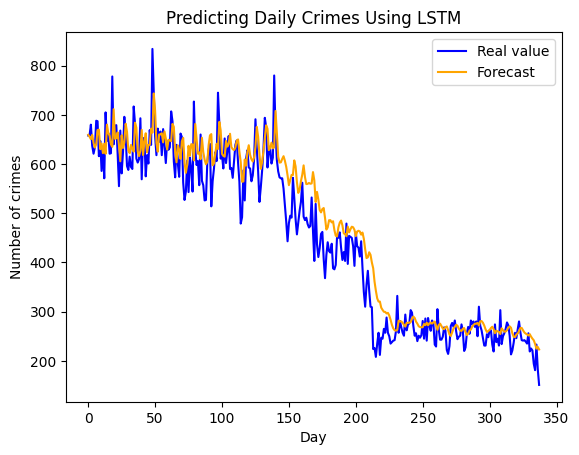

In [13]:
plt.plot(y_test_rescaled, label='Real value', color='blue')
plt.plot(predictions, label='Forecast', color='orange')
plt.legend()

plt.title('Predicting Daily Crimes Using LSTM')
plt.xlabel('Day')
plt.ylabel('Number of crimes') 
plt.show()

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Tính MAE, MSE, RMSE, MAPE, và R-squared
mae = mean_absolute_error(y_test_rescaled, predictions)
mse = mean_squared_error(y_test_rescaled, predictions)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test_rescaled - predictions) / y_test_rescaled)) * 100
r2 = r2_score(y_test_rescaled, predictions)

# In kết quả đánh giá mô hình
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"R-squared (R² Score): {r2:.4f}")


Mean Absolute Error (MAE): 41.16
Mean Squared Error (MSE): 2901.45
Root Mean Squared Error (RMSE): 53.87
Mean Absolute Percentage Error (MAPE): 10.26%
R-squared (R² Score): 0.9011


# 2. Crime data analysis

In [15]:
# Path of csv data file
file_path = "/kaggle/input/crime-data-from-2020-to-present/Crime_Data_from_2020_to_Present.csv"

# Read file csv
df = pd.read_csv(file_path)


In [16]:
# Information column
df.info()
# Size data
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 978628 entries, 0 to 978627
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           978628 non-null  int64  
 1   Date Rptd       978628 non-null  object 
 2   DATE OCC        978628 non-null  object 
 3   TIME OCC        978628 non-null  int64  
 4   AREA            978628 non-null  int64  
 5   AREA NAME       978628 non-null  object 
 6   Rpt Dist No     978628 non-null  int64  
 7   Part 1-2        978628 non-null  int64  
 8   Crm Cd          978628 non-null  int64  
 9   Crm Cd Desc     978628 non-null  object 
 10  Mocodes         834648 non-null  object 
 11  Vict Age        978628 non-null  int64  
 12  Vict Sex        841430 non-null  object 
 13  Vict Descent    841419 non-null  object 
 14  Premis Cd       978613 non-null  float64
 15  Premis Desc     978043 non-null  object 
 16  Weapon Used Cd  325959 non-null  float64
 17  Weapon Des

(978628, 28)

In [17]:
df.shape

(978628, 28)

In [18]:
# Statistics such as min (minimum value), max (maximum value), mean (average value), std (standard deviation), and percentiles (25%, 50%, 75%)
df.describe()

,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
count,9.786280e+05,978628.000000,978628.000000,978628.000000,978628.000000,978628.000000,978628.000000,978613.000000,325959.000000,978617.000000,68816.000000,2309.000000,64.00000,978628.000000,978628.000000
mean,2.196564e+08,1338.802627,10.702561,1116.686084,1.404785,500.810635,29.122904,306.181502,363.815372,500.564847,958.156344,984.192724,991.21875,33.995399,-118.081108
std,1.290395e+07,651.622947,6.107280,610.836054,0.490851,206.309796,21.961531,218.908131,123.673988,206.107451,110.251477,51.506344,27.06985,1.640056,5.684520
min,8.170000e+02,1.000000,1.000000,101.000000,1.000000,110.000000,-4.000000,101.000000,101.000000,110.000000,210.000000,310.000000,821.00000,0.000000,-118.667600
25%,2.106073e+08,900.000000,5.000000,589.000000,1.000000,331.000000,0.000000,101.000000,311.000000,331.000000,998.000000,998.000000,998.00000,34.014600,-118.430500
50%,2.208116e+08,1420.000000,11.000000,1141.000000,1.000000,442.000000,30.000000,203.000000,400.000000,442.000000,998.000000,998.000000,998.00000,34.058900,-118.322500
75%,2.309110e+08,1900.000000,16.000000,1617.000000,2.000000,626.000000,44.000000,501.000000,400.000000,626.000000,998.000000,998.000000,998.00000,34.164900,-118.273900
max,2.499253e+08,2359.000000,21.000000,2199.000000,2.000000,956.000000,120.000000,976.000000,516.000000,956.000000,999.000000,999.000000,999.00000,34.334300,0.000000


### 1.1. Crime chart by area

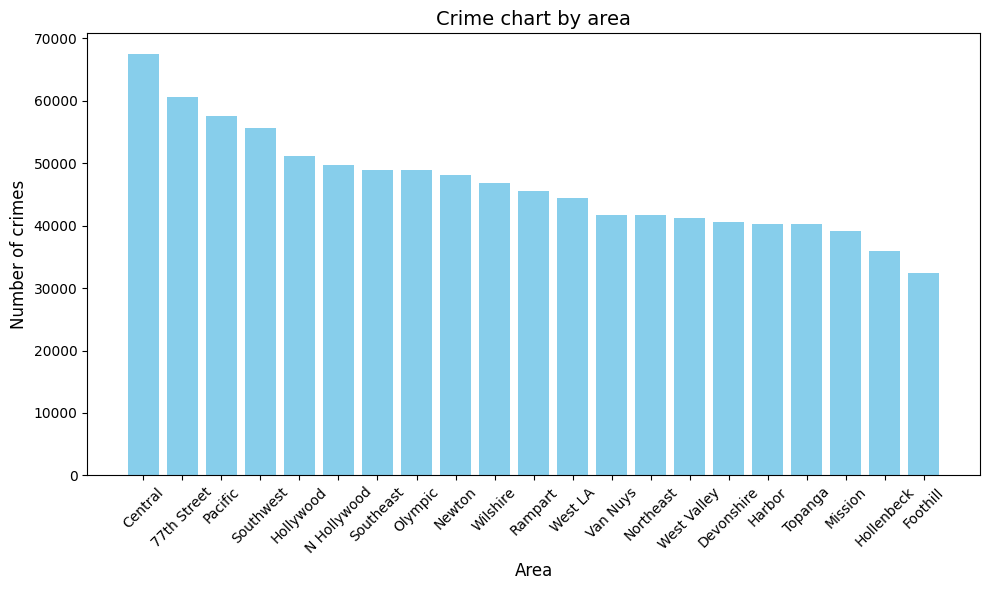

In [19]:
# Plotting Crime by Area
plt.figure(figsize=(10, 6))
area_counts = df['AREA NAME'].value_counts()
plt.bar(area_counts.index, area_counts.values, color='skyblue')
plt.title('Crime chart by area', fontsize=14)
plt.xlabel('Area', fontsize=12)
plt.ylabel('Number of crimes', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

### 1.2. Weapon Crime Chart

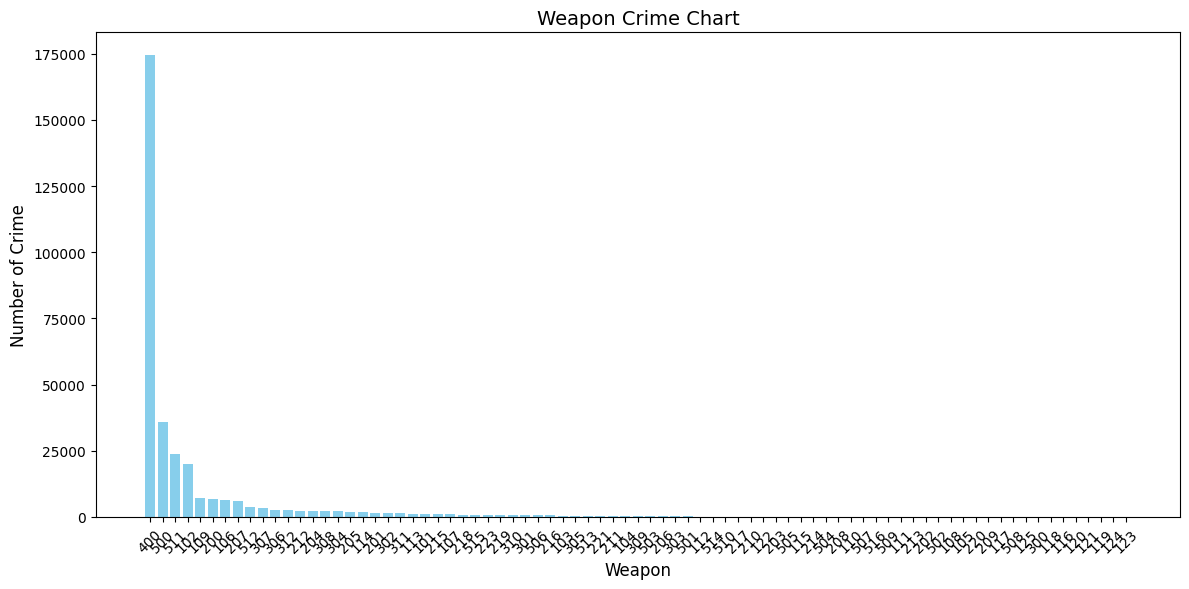

In [20]:
import matplotlib.pyplot as plt

# Loại bỏ NaN và chuyển kiểu dữ liệu nếu cần
df_cleaned = df['Weapon Used Cd'].dropna().astype(int)

# Đếm số lần xuất hiện của từng loại vũ khí
weapon_counts = df_cleaned.value_counts()

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
plt.bar(weapon_counts.index.astype(str), weapon_counts.values, color='skyblue')
plt.title('Weapon Crime Chart', fontsize=14)
plt.xlabel('Weapon', fontsize=12)
plt.ylabel('Number of Crime', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 1.3. Crime graph by time of day

In [21]:
def convert_time_to_24h(time):
    hour = time // 100  
    minute = time % 100  
    return f"{hour:02d}:{minute:02d}"

df['TIME OCC 24H'] = df['TIME OCC'].apply(lambda x: f"{x // 100:02d}:00")


hours = [f"{h:02d}:00" for h in range(24)]


time_counts = df['TIME OCC 24H'].value_counts().reindex(hours, fill_value=0).sort_index()

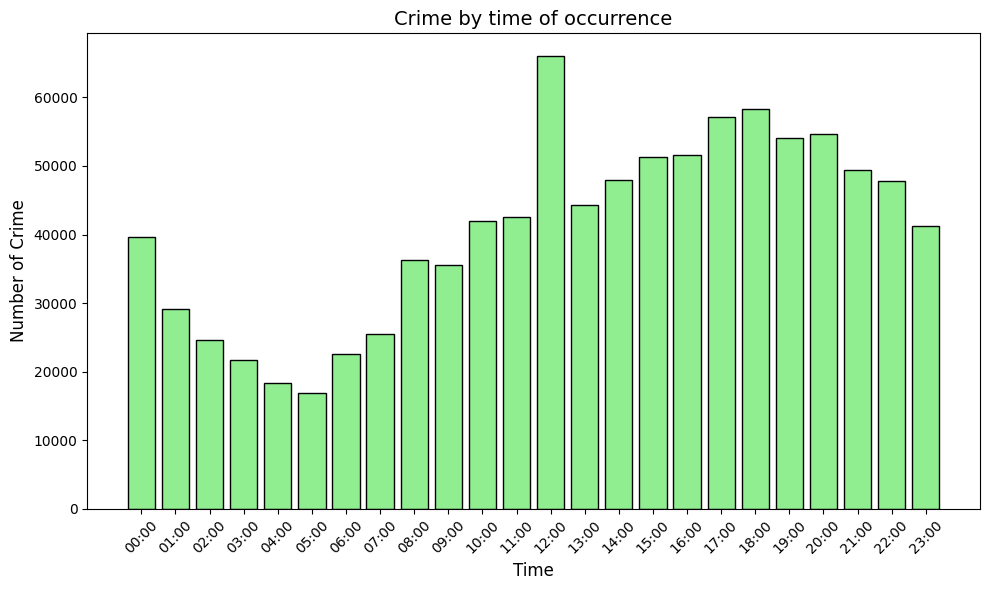

In [22]:
plt.figure(figsize=(10, 6))


plt.bar(time_counts.index, time_counts.values, color='lightgreen', edgecolor='black')


plt.title('Crime by time of occurrence', fontsize=14)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Number of Crime', fontsize=12)


plt.xticks(rotation=45)
plt.tight_layout()


plt.show()

### 1.4. Chart by crime by victim age

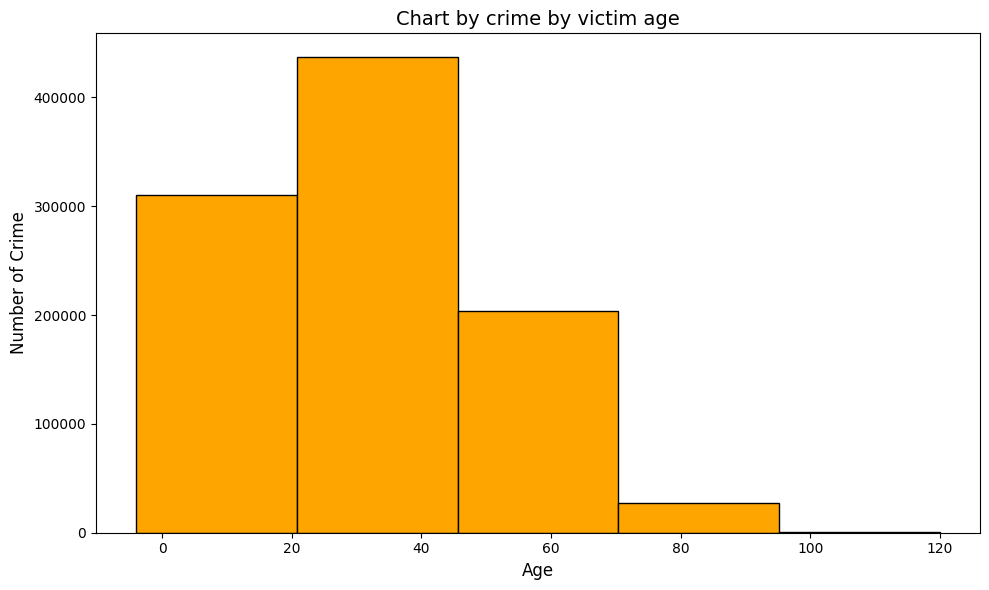

In [23]:
# Plotting Crime by Victim Age
plt.figure(figsize=(10, 6))
plt.hist(df['Vict Age'], bins=5, color='orange', edgecolor='black')
plt.title('Chart by crime by victim age', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of Crime', fontsize=12)
plt.tight_layout()

# Saving figure
plt.show()


### 1.5. Chart by danger level

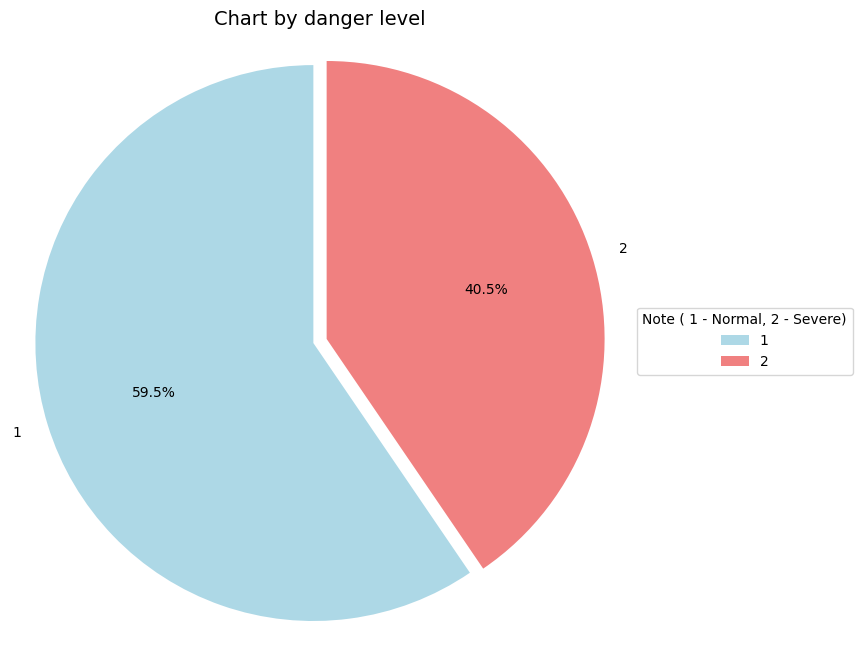

In [24]:
part_counts = df['Part 1-2'].value_counts()


plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(part_counts, labels=part_counts.index, autopct='%1.1f%%', 
                                   colors=['lightblue', 'lightcoral'], startangle=90, 
                                   explode=(0.05, 0))

plt.title('Chart by danger level', fontsize=14)


plt.legend(wedges, part_counts.index, title="Note ( 1 - Normal, 2 - Severe)", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))


plt.axis('equal') 



plt.show()

### 1.6. Vict Sex Column Chart

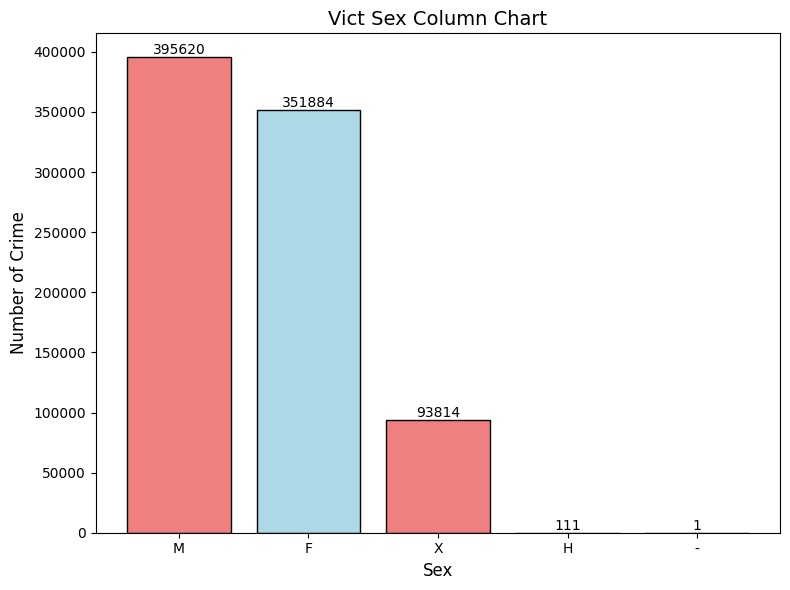

In [25]:
plt.figure(figsize=(8, 6))
vict_sex_counts = df['Vict Sex'].value_counts()
bars = plt.bar(vict_sex_counts.index, vict_sex_counts.values, color=['lightcoral', 'lightblue'], edgecolor='black')
plt.title('Vict Sex Column Chart', fontsize=14)
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Number of Crime', fontsize=12)

# Thêm ghi chú cho từng thanh
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, yval, ha='center', va='bottom')

plt.tight_layout()


plt.show()

### 1.7. Vict Descent Bar Chart

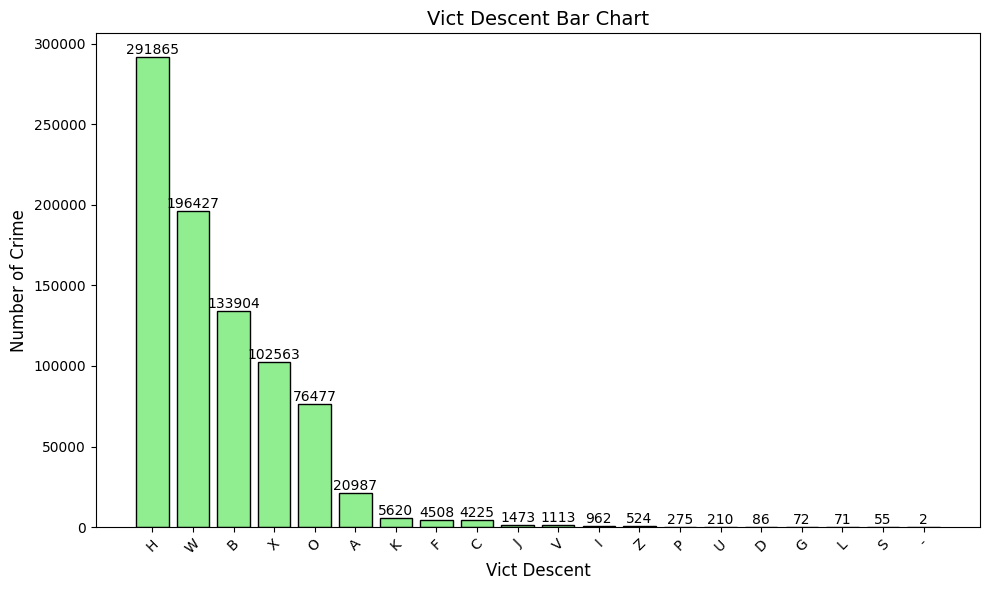

In [26]:
plt.figure(figsize=(10, 6))
vict_descent_counts = df['Vict Descent'].value_counts()
bars = plt.bar(vict_descent_counts.index, vict_descent_counts.values, color='lightgreen', edgecolor='black')
plt.title('Vict Descent Bar Chart', fontsize=14)
plt.xlabel('Vict Descent', fontsize=12)
plt.ylabel('Number of Crime', fontsize=12)
plt.xticks(rotation=45)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, yval, ha='center', va='bottom')

plt.tight_layout()

plt.show()


# 3. Visualize on the map

In [27]:
#Rename "Crm Cd Desc" to Crime_Type for easier referencing
df.rename(columns = {'Crm Cd Desc':'Crime_Type'}, inplace = True)
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crime_Type,...,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,TIME OCC 24H
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506,21:00
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628,18:00
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002,17:00
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387,20:00
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277,12:00


In [28]:
#set index
df = df.set_index(['DR_NO'])

In [29]:
#get the first 500 crimes in the df_incidents dataframe
limit = 500
df_incidents = df.iloc[0:limit, :]
df_incidents.shape

(500, 28)

In [30]:
import folium
from folium import plugins

In [31]:
#assign LA coordinates
la_longitude = -118.2426
la_latitude = 34.0549

#Define the world map centered around Los Angeles with a higher zoom level
la_map = folium.Map(location=[la_latitude, la_longitude], zoom_start=9)

#Display map
la_map

In [32]:
#Instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

#Loop through the 500 crimes and add each to the incidents feature group
for lat, lng, in zip(df_incidents.LAT, df_incidents.LON):
    incidents.add_child(
        folium.vector_layers.CircleMarker(
            [lat, lng],
            radius=4.0,
            color='gray',
            fill=True,
            fill_color='orange',
            fill_opacity=1.0
        )
    )

#Add incidents to map
la_map.add_child(incidents)

In [33]:
#Add pop-up text to each marker on the map
latitudes = list(df_incidents.LAT)
longitudes = list(df_incidents.LON)
labels = list(df_incidents.Crime_Type)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(la_map)    
    
#Add incidents to map
la_map.add_child(incidents)

In [34]:
#Create a second map with the same LA coordinates
la_map2 = folium.Map(location = [la_latitude, la_longitude], zoom_start = 9)

#Instantiate a mark cluster object for the incidents in the dataframe
incidents2 = plugins.MarkerCluster().add_to(la_map2)

#Loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(df_incidents.LAT, df_incidents.LON, df_incidents.Crime_Type):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(incidents2)

#Display map
la_map2

In [35]:
df['maps'] = ((df['Crm Cd'] - df['Crm Cd'].min()) / (df['Crm Cd'].max() - df['Crm Cd'].min())) * 100

In [36]:
df

,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crime_Type,Mocodes,...,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,TIME OCC 24H,maps
DR_NO,,,,,,,,,,,,,,,,,,,,,
190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,NaN,...,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506,21:00,47.281324
200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,1822 1402 0344,...,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628,18:00,26.004728
200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,0344 1251,...,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002,17:00,43.735225
200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),0325 1501,...,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387,20:00,27.541371
220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,1822 1501 0930 2004,...,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277,12:00,28.841608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240710284,07/24/2024 12:00:00 AM,07/23/2024 12:00:00 AM,1400,7,Wilshire,788,1,510,VEHICLE - STOLEN,NaN,...,510.0,NaN,NaN,NaN,4000 W 23RD ST,NaN,34.0362,-118.3284,14:00,47.281324
240104953,01/15/2024 12:00:00 AM,01/15/2024 12:00:00 AM,100,1,Central,101,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 0400 0416,...,745.0,NaN,NaN,NaN,1300 W SUNSET BL,NaN,34.0685,-118.2460,01:00,75.059102
241711348,07/19/2024 12:00:00 AM,07/19/2024 12:00:00 AM,757,17,Devonshire,1751,2,888,TRESPASSING,1501,...,888.0,NaN,NaN,NaN,10000 OLD DEPOT PLAZA RD,NaN,34.2500,-118.5990,07:00,91.962175


In [37]:
import folium
from folium.plugins import HeatMap


df_limited = df.head(1000)

m = folium.Map(location=[34.05, -118.25], zoom_start=12)


heat_data = [[row['LAT'], row['LON'], row['maps']] for index, row in df_limited.iterrows()]


HeatMap(
    heat_data,
    radius=15,
    blur=10,
    min_opacity=0.2
).add_to(m)


displayed_areas = set()


for index, row in df_limited.iterrows():
    if row['maps'] > 70 and row['AREA NAME'] not in displayed_areas:
        folium.Marker(
            location=[row['LAT'], row['LON']],
            popup=row['AREA NAME'],
            icon=folium.Icon(color='red', icon='info-sign')
        ).add_to(m)
        displayed_areas.add(row['AREA NAME'])

m.save("heatmap_with_limited_area_names.html")
m